# Лабораторна робота 3: Знайомство з нейромережами

## 2. Згорткові нейронні мережі

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import kagglehub

# Download latest version
path = kagglehub.dataset_download("muratkokludataset/pistachio-image-dataset")
print("Path to dataset files:", path)

pst_train, pst_test = keras.preprocessing.image_dataset_from_directory(
    path+'/Pistachio_Image_Dataset/Pistachio_Image_Dataset',
    labels='inferred',
    label_mode='categorical',
    image_size=(600, 600),
    batch_size=175,
    validation_split=0.2,
    subset='both',
    seed=12435
)


c:\Users\matki\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: C:\Users\matki\.cache\kagglehub\datasets\muratkokludataset\pistachio-image-dataset\versions\1
Found 2148 files belonging to 2 classes.
Using 1719 files for training.
Using 429 files for validation.


In [2]:
model = keras.Sequential([
    layers.Input(shape=(600, 600, 3)),
    layers.Rescaling(1./255),

    layers.Conv2D(16, (3, 3), padding="same", strides=1),
    layers.LeakyReLU(negative_slope=0.1),
    layers.Conv2D(32, (4, 4), padding="same", strides=2),
    layers.LeakyReLU(negative_slope=0.1),
    layers.Conv2D(64, (5, 5), padding="same", strides=3),
    layers.LeakyReLU(negative_slope=0.1),

    layers.MaxPooling2D((3, 3), padding="same"),

    layers.Conv2D(128, (4, 4), padding="same", strides=2),
    layers.LeakyReLU(negative_slope=0.1),
    layers.Conv2D(256, (4, 4), padding="same", strides=2),
    layers.LeakyReLU(negative_slope=0.1),

    layers.MaxPooling2D((3, 3), padding="same"),

    layers.Conv2D(512, (3, 3), padding="same", strides=1),
    layers.LeakyReLU(negative_slope=0.1),

    layers.MaxPooling2D((3, 3), padding="same"),

    layers.Flatten(),
    layers.Dense(256, activation="relu"),
    layers.Dense(128, activation="relu"),

    layers.Dense(2, activation="softmax")
])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 600, 600, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 600, 600, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 600, 600, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 300, 300, 32)   │         8,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 300, 300, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 100, 100, 64)   │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 100, 100, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 34, 34, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 17, 17, 128)    │       131,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_3 (LeakyReLU)       │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 9, 9, 256)      │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_4 (LeakyReLU)       │ (None, 9, 9, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 3, 3, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 3, 3, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_5 (LeakyReLU)       │ (None, 3, 3, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 1, 1, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,060,322 (7.86 MB)

 Trainable params: 2,060,322 (7.86 MB)

 Non-trainable params: 0 (0.00 B)

In [3]:
model.compile(loss='categorical_crossentropy', optimizer='nadam', metrics=['accuracy'])

history = model.fit(
    pst_train,
    validation_data=pst_test,
    epochs=10,
    callbacks=[tf.keras.callbacks.EarlyStopping(patience=8, restore_best_weights=True)],
    verbose=1
)

Epoch 1/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 92s 9s/step - accuracy: 0.5817 - loss: 0.7002 - val_accuracy: 0.6154 - val_loss: 0.6539
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 85s 9s/step - accuracy: 0.6340 - loss: 0.6183 - val_accuracy: 0.7762 - val_loss: 0.5164
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 85s 8s/step - accuracy: 0.8151 - loss: 0.4622 - val_accuracy: 0.7739 - val_loss: 0.4487
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 85s 8s/step - accuracy: 0.8325 - loss: 0.3936 - val_accuracy: 0.8065 - val_loss: 0.4072
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 85s 8s/step - accuracy: 0.8226 - loss: 0.3906 - val_accuracy: 0.8135 - val_loss: 0.4037
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 86s 9s/step - accuracy: 0.8403 - loss: 0.3696 - val_accuracy: 0.8112 - val_loss: 0.3968
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 92s 9s/step - accuracy: 0.8399 - loss: 0.3438 - val_accuracy: 0.8298 - val_loss: 0.3886
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 90s 9s/step - accuracy: 0.8711 - loss: 0.3142 - val_accuracy: 0.8438 - val_loss:

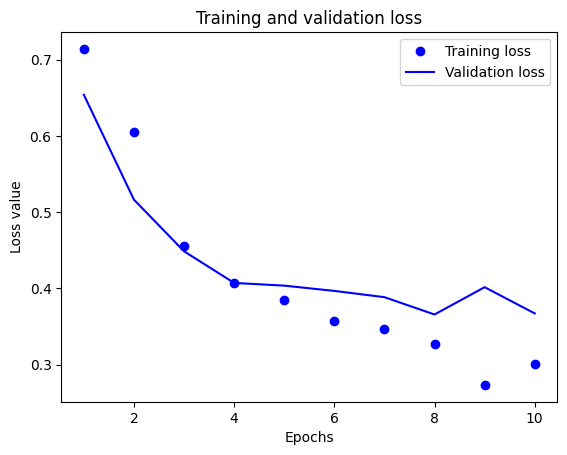

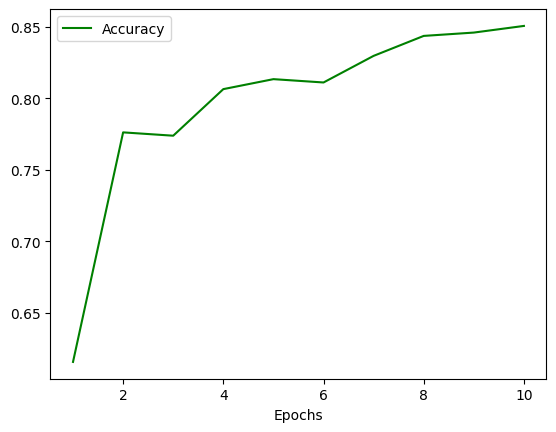

In [5]:
import matplotlib.pyplot as plt

history_dict = history.history

epochs = range(1, len(history_dict["loss"]) + 1)
plt.plot(epochs, history_dict["loss"], "bo", label="Training loss")
plt.plot(epochs, history_dict["val_loss"], "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss value")
plt.legend()
plt.show()

plt.plot(epochs, history_dict["val_accuracy"], "g", label="Accuracy")
plt.xlabel("Epochs")
plt.legend()
plt.show()

In [2]:
from keras.applications.inception_v3 import InceptionV3
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D

# create the base pre-trained model
base_model = InceptionV3(weights='imagenet', include_top=False)

# add a global spatial average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)
# let's add a fully-connected layer
x = Dense(512, activation='relu')(x)
# and a logistic layer -- let's say we have 200 classes
predictions = Dense(2, activation='softmax')(x)
# this is the model we will train
model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False

model.compile(optimizer='nadam', loss='categorical_crossentropy', metrics=['accuracy'])


# train the model on the new data for a few epochs
history = model.fit(
    pst_train,
    validation_data=pst_test,
    epochs=5,
    callbacks=[tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)],
    verbose=1
)



Epoch 1/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 308s 31s/step - accuracy: 0.5191 - loss: 15.5440 - val_accuracy: 0.6154 - val_loss: 6.6485
Epoch 2/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 296s 30s/step - accuracy: 0.5220 - loss: 6.4759 - val_accuracy: 0.6434 - val_loss: 3.4555
Epoch 3/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 296s 30s/step - accuracy: 0.6332 - loss: 2.5955 - val_accuracy: 0.7809 - val_loss: 1.1281
Epoch 4/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 297s 30s/step - accuracy: 0.8079 - loss: 0.7930 - val_accuracy: 0.8089 - val_loss: 0.5935
Epoch 5/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 296s 30s/step - accuracy: 0.8218 - loss: 0.6061 - val_accuracy: 0.8368 - val_loss: 0.4436


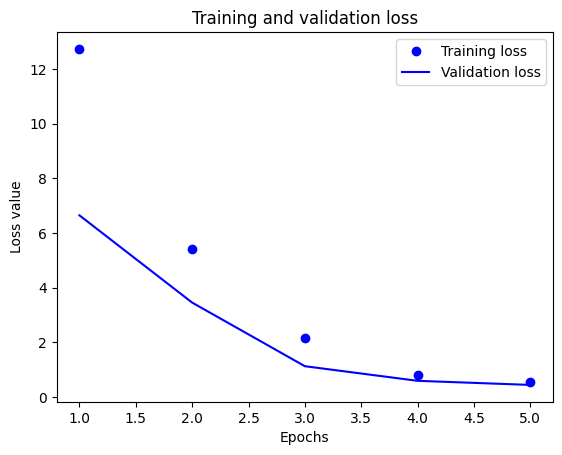

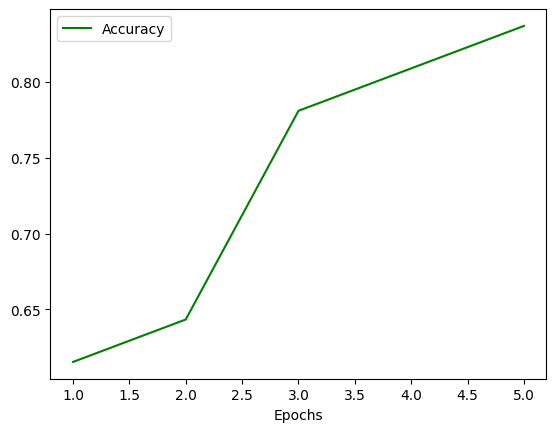

In [4]:
import matplotlib.pyplot as plt

history_dict = history.history

epochs = range(1, len(history_dict["loss"]) + 1)
plt.plot(epochs, history_dict["loss"], "bo", label="Training loss")
plt.plot(epochs, history_dict["val_loss"], "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss value")
plt.legend()
plt.show()

plt.plot(epochs, history_dict["val_accuracy"], "g", label="Accuracy")
plt.xlabel("Epochs")
plt.legend()
plt.show()